In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [2]:
df = pd.read_csv("kc_house_data.csv")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df = df.dropna()
display(df.isna().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

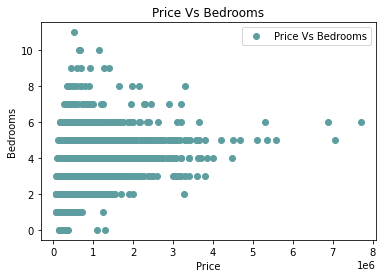

In [9]:
#remove the outlier bedroom (33) value
df = df[df.bedrooms != 33]

#define the data for the x and y coordinates

x = df['price']
y = df['bedrooms']


#create the scatterplot

plt.plot(x, y, 'o', color = 'cadetblue', label = 'Price Vs Bedrooms')

plt.title('Price Vs Bedrooms')
plt.xlabel('Price')
plt.ylabel('Bedrooms')
plt.legend()
plt.show()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A421F4BA60>,
      dtype=object)

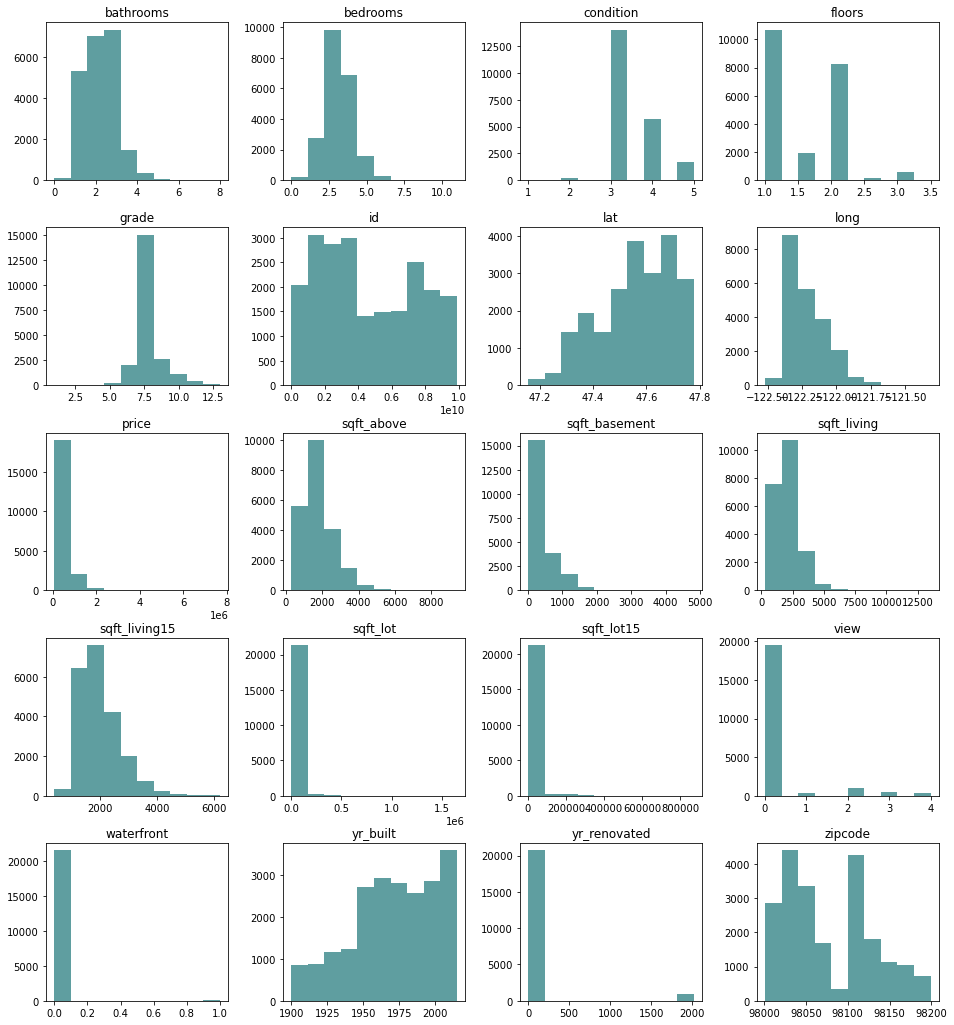

In [17]:
#plot as a histogram

df.hist(grid = False, color = 'cadetblue', figsize = (16,18))


In [18]:
#measure the correlation 

corr_matrix = df.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016788,0.002461,0.005144,-0.012276,-0.132118,0.018494,-0.002724,0.011582,-0.023701,0.008111,-0.010874,-0.005128,0.021352,-0.016915,-0.008208,-0.001859,0.020770,-0.002935,-0.138810
price,-0.016788,1.000000,0.315434,0.525144,0.702055,0.089658,0.256803,0.266332,0.397352,0.036366,0.667476,0.605589,0.323833,0.053993,0.126445,-0.053174,0.306914,0.021582,0.585399,0.082460
bedrooms,0.002461,0.315434,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.081930,0.025478,0.366502,0.490600,0.309490,0.159167,0.019617,-0.157093,-0.010541,0.133882,0.402626,0.030402
bathrooms,0.005144,0.525144,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,0.187732,-0.124946,0.664979,0.685339,0.283789,0.506012,0.050735,-0.203858,0.024594,0.223028,0.568628,0.087170
sqft_living,-0.012276,0.702055,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,0.284606,-0.058704,0.762701,0.876597,0.435065,0.318037,0.055358,-0.199421,0.052552,0.240209,0.756419,0.183280
sqft_lot,-0.132118,0.089658,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,0.074707,-0.008935,0.113616,0.183507,0.015293,0.053073,0.007641,-0.129571,-0.085675,0.229516,0.144602,0.718556
floors,0.018494,0.256803,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,0.029432,-0.263706,0.458171,0.523866,-0.245684,0.489302,0.006330,-0.059102,0.049655,0.125388,0.279856,-0.011282
waterfront,-0.002724,0.266332,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.401857,0.016665,0.082773,0.072072,0.080591,-0.026165,0.092884,0.030287,-0.014270,-0.041914,0.086461,0.030702
view,0.011582,0.397352,0.081930,0.187732,0.284606,0.074707,0.029432,0.401857,1.000000,0.046031,0.251315,0.167640,0.276959,-0.053452,0.103915,0.084834,0.006170,-0.078413,0.280432,0.072571
condition,-0.023701,0.036366,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,0.046031,1.000000,-0.144632,-0.158136,0.174057,-0.361380,-0.060602,0.002973,-0.015048,-0.106423,-0.092731,-0.003373


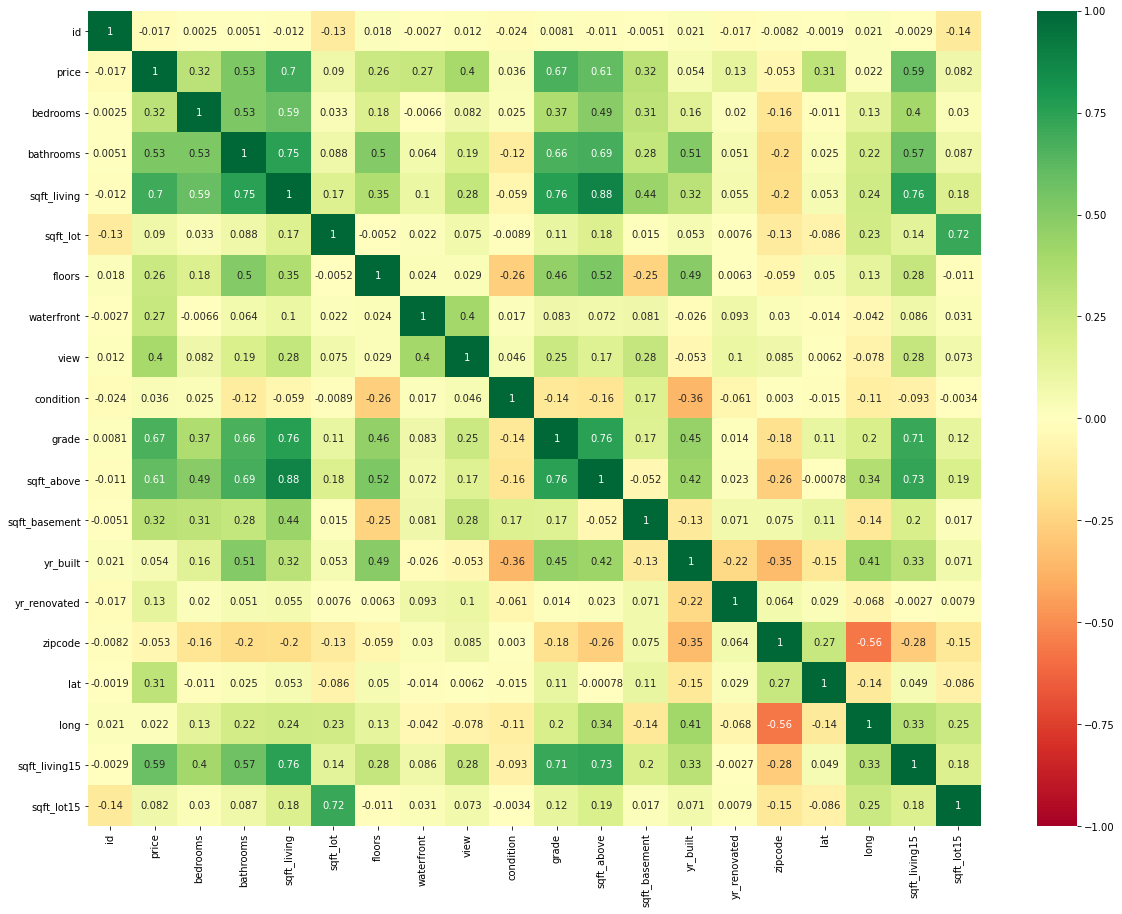

In [19]:
#create a heatmap

from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(corr_matrix, cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

In [20]:
#start the model

from scipy import stats

X = df['price']
Y = df['bedrooms']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 7.796179742565425e-07
The intercept is: 2.9483385448450177


In [21]:
import statsmodels.api as sm
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)

In [22]:
#create a statistical summary

X = df['bedrooms']
Y = df['price']
X = sm.add_constant(X)
results1 = sm.OLS(Y, X).fit()
results1.summary()

# a bit concerned r-squared value is so low 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2388.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:26:07   Log-Likelihood:            -3.0647e+05
No. Observations:               21612   AIC:                         6.129e+05
Df Residuals:                   21610   BIC:                         6.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.101e+05   9114.326     12.085      0.000    9.23e+04    1.28e+05
bedrooms    1.276e+05   2611.809     48.865      0.000    1.23e+05    1.33e+05
==============================================================================
Omnibus:                    18934.202   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1168972.109
Skew:                           3.942   Prob(JB):                         0.00
Kurtosis:                      38.156   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

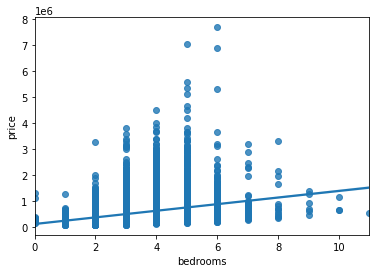

In [13]:
from scipy.stats import f_oneway

import seaborn as sns
#what is le6 and why is it there?

sns.regplot(x="bedrooms", y="price", data=df);

In [24]:

X = df['price']
Y = df['bedrooms']
X = sm.add_constant(X)
results1 = sm.OLS(Y, X).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               bedrooms   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2388.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:26:08   Log-Likelihood:                -27447.
No. Observations:               21612   AIC:                         5.490e+04
Df Residuals:                   21610   BIC:                         5.491e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9483      0.010    282.881      0.000       2.928       2.969
price       7.796e-07    1.6e-08     48.865      0.000    7.48e-07    8.11e-07
==============================================================================
Omnibus:                     1883.599   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4898.023
Skew:                           0.507   Prob(JB):                         0.00
Kurtosis:                       5.101   Cond. No.                     1.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#this now drops price and date for X (so measures all variables relation to Y(price) expect for price & Date)

X = df.drop(['price', 'date'], axis=1)
Y = df['price']
X = sm.add_constant(X)
results1 = sm.OLS(Y, X).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2804.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:26:09   Log-Likelihood:            -2.9458e+05
No. Observations:               21612   AIC:                         5.892e+05
Df Residuals:                   21593   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.278e+06   2.93e+06      2.482      0.013    1.53e+06     1.3e+07
id            -1.279e-06   4.82e-07     -2.652      0.008   -2.22e-06   -3.34e-07
bedrooms      -3.913e+04   1969.805    -19.866      0.000    -4.3e+04   -3.53e+04
bathrooms       4.23e+04   3257.867     12.985      0.000    3.59e+04    4.87e+04
sqft_living     111.8013      2.280     49.045      0.000     107.333     116.269
sqft_lot          0.1193      0.048      2.486      0.013       0.025       0.213
floors         6654.1747   3594.806      1.851      0.064    -391.910    1.37e+04
waterfront     5.813e+05   1.74e+04     33.493      0.000    5.47e+05    6.15e+05
view           5.284e+04   2140.598     24.683      0.000    4.86e+04     5.7e+04
condition       2.62e+04   2351.216     11.143      0.000    2.16e+04    3.08e+04
grade           9.56e+04   2154.117     44.379      0.000    9.14e+04    9.98e+04
sqft_above       71.3723      2.256     31.643      0.000      66.951      75.793
sqft_basement    40.4235      2.648     15.266      0.000      35.233      45.614
yr_built      -2634.7963     72.659    -36.263      0.000   -2777.213   -2492.380
yr_renovated     19.4343      3.655      5.317      0.000      12.270      26.599
zipcode        -585.2154     32.978    -17.746      0.000    -649.855    -520.576
lat            6.013e+05   1.07e+04     56.020      0.000     5.8e+05    6.22e+05
long          -2.131e+05   1.31e+04    -16.204      0.000   -2.39e+05   -1.87e+05
sqft_living15    21.6420      3.447      6.279      0.000      14.886      28.398
sqft_lot15       -0.4018      0.073     -5.472      0.000      -0.546      -0.258
==============================================================================
Omnibus:                    18303.074   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1846274.502
Skew:                           3.542   Prob(JB):                         0.00
Kurtosis:                      47.722   Cond. No.                     2.93e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.39e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
#put heatmap 

#look into non-linear regressions
#go further - try with a city elsewhere 
#the try to see if this sample is representative from population
#try goodness of fit to model population

#presentation - present results  in tableau

In [29]:

X = df[['bedrooms', 'yr_built', 'bathrooms']]
Y = df['price']
X = sm.add_constant(X)
results1 = sm.OLS(Y, X).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     3646.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:16:59   Log-Likelihood:            -3.0318e+05
No. Observations:               21612   AIC:                         6.064e+05
Df Residuals:                   21608   BIC:                         6.064e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.84e+06   1.58e+05     43.321      0.000    6.53e+06    7.15e+06
bedrooms    3817.0245   2672.644      1.428      0.153   -1421.555    9055.604
yr_built   -3542.3334     81.274    -43.585      0.000   -3701.636   -3383.030
bathrooms   3.165e+05   3606.477     87.751      0.000    3.09e+05    3.24e+05
==============================================================================
Omnibus:                    16781.247   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           834941.041
Skew:                           3.308   Prob(JB):                         0.00
Kurtosis:                      32.722   Cond. No.                     1.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:

X = df[['bedrooms', 'yr_built', 'bathrooms', 'sqft_living']]
Y = df['price']
X = sm.add_constant(X)
results1 = sm.OLS(Y, X).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     6670.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:17:22   Log-Likelihood:            -2.9891e+05
No. Observations:               21612   AIC:                         5.978e+05
Df Residuals:                   21607   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.074e+06    1.3e+05     46.779      0.000    5.82e+06    6.33e+06
bedrooms    -7.572e+04   2328.053    -32.524      0.000   -8.03e+04   -7.12e+04
yr_built    -3088.7093     66.872    -46.188      0.000   -3219.784   -2957.634
bathrooms    8.478e+04   3728.669     22.738      0.000    7.75e+04    9.21e+04
sqft_living   302.8491      2.962    102.231      0.000     297.043     308.656
==============================================================================
Omnibus:                    13864.182   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           471630.359
Skew:                           2.575   Prob(JB):                         0.00
Kurtosis:                      25.299   Cond. No.                     2.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2388.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:06:08   Log-Likelihood:                -27447.
No. Observations:               21612   AIC:                         5.490e+04
Df Residuals:                   21610   BIC:                         5.491e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9483      0.010    282.881      0.0

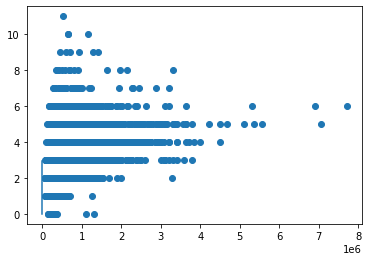

In [12]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
X = df['price']
Y = df['bedrooms']


results = sm.OLS(Y,sm.add_constant(X)).fit()

print(results.summary())

plt.scatter(X,Y)

X_plot = np.linspace(0,1,100)
plt.plot(X_plot, X_plot*results.params[0] + results.params[1])

plt.show()

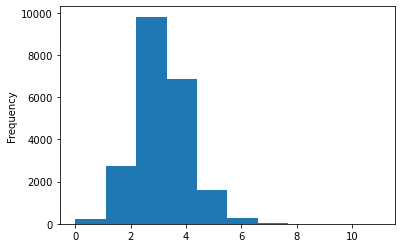

In [3]:
df['bedrooms'].plot(kind='hist');
